In [180]:
## KOOD ANDMETE TÖÖTLEMISEKS JA .csv FAILI GENEREERIMISEKS ##

# file_path on sisendfaili nimi

# file_path = 'synthetic_data_pca.csv'
# file_path = 'synthetic_data_lung_cancer.csv'

import pandas as pd

df = pd.read_csv(file_path)

# Loome algsest andmestikust uue, töödeldud andmestiku.
# Uues andmestikus tähistavad veerud kõiki tehtud protseduure, read inimesi (üks rida on üks inimene).

# Igas reas on veeru väärtused vastavalt: kui inimesele tehti protseduur, 
# on veerus väärtus. Kui ei tehtud, puudub väärtus (1-hot vektor). 

# Idee on, et masinõppe käigus tehakse järeldused, et teatud protseduuridel on korrelatsioonid suremise ja ellujäämisega

# Grupeerime protseduurid inimeste kaupa ehk saame valida valitud isikule kõik tehtud protseduurid.
groups = df.groupby('SUBJECT_ID')

# .csv faili jaoks veerude nimetused. Veerudeks valime kõik tehtud protseduurid.
columns = ['id']
columns += df['DEFINITION_ID'].unique().tolist()

input_df = pd.DataFrame(columns=columns)

# Iga inimese kohta loome dictionary objekti, mis kujutab ühte rida töödeldud andmestikus.
for name, group in groups:
    procedures = {}
    procedures['id'] = name
    
    # Dictis on inimesele tehtud protseduurid.
    # Kui on dictis olemas protseduuri nimi, tehti inimesele antud protseduur. Kui puudub, siis ei tehtud.
    for row in group[['DEFINITION_ID', 'TIME']].values:
        if row[0] not in procedures.keys():
            procedures[row[0]] = True

    procedures_df = pd.DataFrame([procedures])
    input_df = pd.concat([input_df, procedures_df], ignore_index=True)
    # Kõik mittetehtud protseduuride väärtused muudame False-ks
    input_df = input_df.fillna(False)
    
# Selline andmestiku töötlemine võtab aega ~5 minutit per .csv?

# input_df.to_csv("output_boolean_validation.csv")

In [181]:
train_df = pd.read_csv("output_boolean.csv")
# replace kuna true/false andmestik olemas, ei pea uuesti genereerima
train_df = train_df.replace(True, 1)
train_df = train_df.replace(False, 0)

df_death = train_df[train_df['death'] == 1]
df_death = df_death.drop('death', axis=1)
df_death = df_death.drop('Unnamed: 0', axis=1)
df_death = df_death.drop('id', axis=1)

top15_columns_death = df_death.sum().sort_values(ascending=False).head(150).index # number = mitu top veergu
df_top15_death = train_df[top15_columns_death]

death_column_names = {old: f'top{i+1}_death' for i, old in enumerate(top15_columns_death)}
df_top15_death.rename(columns=death_column_names, inplace=True)

df_alive = train_df[train_df['death'] == 0]
df_alive = df_alive.drop('death', axis=1)
df_alive = df_alive.drop('Unnamed: 0', axis=1)
df_alive = df_alive.drop('id', axis=1)

top15_columns_alive = list(df_alive.sum().sort_values(ascending=False).head(150).index)
top15_columns_alive.append('death')
df_top15_alive = train_df[top15_columns_alive]

top15_columns_alive = top15_columns_alive[:-1]

alive_column_names = {old: f'top{i+1}_alive' for i, old in enumerate(top15_columns_alive)}
df_top15_alive.rename(columns=alive_column_names, inplace=True)

df_top15_train = pd.concat([df_top15_death, df_top15_alive], axis=1)
df_top15_train

/tmp/ipykernel_12352/3436334906.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top15_death.rename(columns=death_column_names, inplace=True)
/tmp/ipykernel_12352/3436334906.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top15_alive.rename(columns=alive_column_names, inplace=True)


,top1_death,top2_death,top3_death,top4_death,top5_death,top6_death,top7_death,top8_death,top9_death,top10_death,...,top142_alive,top143_alive,top144_alive,top145_alive,top146_alive,top147_alive,top148_alive,top149_alive,top150_alive,death
0,0,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,0,1,1,0,0
1,1,0,0,1,1,1,0,0,0,1,...,0,0,0,1,0,1,0,0,1,1
2,0,1,1,0,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
724,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
725,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [182]:
val_df = pd.read_csv("output_boolean_validation.csv")
val_df = val_df.replace(False, 0)
val_df = val_df.replace(True, 1)

df_death = val_df[val_df['death'] == 1]
df_death = df_death.drop('death', axis=1)
df_death = df_death.drop('Unnamed: 0', axis=1)
df_death = df_death.drop('id', axis=1)

top15_columns_death = df_death.sum().sort_values(ascending=False).head(150).index # number = mitu top veergu
df_top15_death = val_df[top15_columns_death]

death_column_names = {old: f'top{i+1}_death' for i, old in enumerate(top15_columns_death)}
df_top15_death.rename(columns=death_column_names, inplace=True)

df_alive = val_df[val_df['death'] == 0]
df_alive = df_alive.drop('death', axis=1)
df_alive = df_alive.drop('Unnamed: 0', axis=1)
df_alive = df_alive.drop('id', axis=1)

top15_columns_alive = list(df_alive.sum().sort_values(ascending=False).head(150).index)
top15_columns_alive.append('death')
df_top15_alive = val_df[top15_columns_alive]

top15_columns_alive = top15_columns_alive[:-1]

alive_column_names = {old: f'top{i+1}_alive' for i, old in enumerate(top15_columns_alive)}
df_top15_alive.rename(columns=alive_column_names, inplace=True)

df_top15_val = pd.concat([df_top15_death, df_top15_alive], axis=1)
df_top15_val

/tmp/ipykernel_12352/808895812.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top15_death.rename(columns=death_column_names, inplace=True)
/tmp/ipykernel_12352/808895812.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top15_alive.rename(columns=alive_column_names, inplace=True)


,top1_death,top2_death,top3_death,top4_death,top5_death,top6_death,top7_death,top8_death,top9_death,top10_death,...,top142_alive,top143_alive,top144_alive,top145_alive,top146_alive,top147_alive,top148_alive,top149_alive,top150_alive,death
0,0,0,0,0,0,0,0,0,1,1,...,0,1,0,1,1,0,0,1,1,0
1,0,1,0,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,1,0,1,1,0,0
3,0,0,1,1,1,1,1,1,1,0,...,1,0,1,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
694,0,1,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
695,0,0,0,0,0,1,0,0,1,1,...,0,0,1,1,0,0,1,0,0,0
696,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [183]:
## ANDMETE JAOTUS ##

x_train = df_top15_train.drop('death', axis=1)
y_train = df_top15_train['death']

x_val = df_top15_val.drop('death', axis=1)
y_val = df_top15_val['death']

In [184]:
## MUDELI TREENIMINE

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# võetud 6. v 7. kodutööst väärtused 
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=3)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, random_state=3)

In [185]:
import numpy as np
y_pred = rf.predict(x_val)
confusion_matrix_result = confusion_matrix(y_val.values, y_pred, labels=[1,0])  # Label=[1,0], otherwise predicted and actual axes are swapped
print("Confusion matrix:\n%s" % confusion_matrix_result)

Confusion matrix:
[[ 54   7]
 [407 230]]


In [186]:
probs = rf.predict_proba(x_val)
assert np.isclose(probs.sum(axis=1), 1).all()
probs_df = pd.DataFrame(probs, columns=rf.classes_)
probs = probs_df[1]
probs

0      0.468853
1      0.567533
2      0.466266
3      0.254116
4      0.546549
         ...   
693    0.571912
694    0.585679
695    0.430204
696    0.523689
697    0.598484
Name: 1, Length: 698, dtype: float64

In [187]:
cutoffs = pd.DataFrame({'cutoff':probs.unique()}) 
cutoffs = cutoffs.sort_values(by='cutoff')
cutoffs.head()

,cutoff
331,0.051264
392,0.096963
101,0.101662
556,0.103118
197,0.104512


In [188]:
tpr = cutoffs.apply(lambda cut: np.sum(np.logical_and(probs >= cut[0], y_val == 1)) / np.sum(y_val == 1), axis=1)
fpr = cutoffs.apply(lambda cut: np.sum(np.logical_and(probs >= cut[0], y_val == 0)) / np.sum(y_val == 0), axis=1)

stats = pd.DataFrame({'cutoff':cutoffs.cutoff, 'tpr':tpr, 'fpr':fpr})

fp_count = cutoffs.apply(lambda cut: np.sum(np.logical_and(probs >= cut.values[0], y_val == 0)), axis=1)
fn_count = cutoffs.apply(lambda cut: np.sum(np.logical_and(probs < cut.values[0], y_val == 1)), axis=1)
acc = cutoffs.apply(lambda cut: (np.sum(np.logical_and(probs < cut.values[0], y_val == 0)) + \
                                 np.sum(np.logical_and(probs >= cut.values[0], y_val == 1)))/probs.shape[0], axis=1)

stats['fp_count'] = fp_count
stats['fn_count'] = fn_count
stats['acc'] = acc
stats

# stats.to_csv("stats.csv")

,cutoff,tpr,fpr,fp_count,fn_count,acc
331,0.051264,1.0,1.000000,637,0,0.087393
392,0.096963,1.0,0.998430,636,0,0.088825
101,0.101662,1.0,0.996860,635,0,0.090258
556,0.103118,1.0,0.995290,634,0,0.091691
197,0.104512,1.0,0.993721,633,0,0.093123
...,...,...,...,...,...,...
396,0.620492,0.0,0.007849,5,61,0.905444
82,0.621235,0.0,0.006279,4,61,0.906877
298,0.621258,0.0,0.004710,3,61,0.908309
408,0.626904,0.0,0.003140,2,61,0.909742


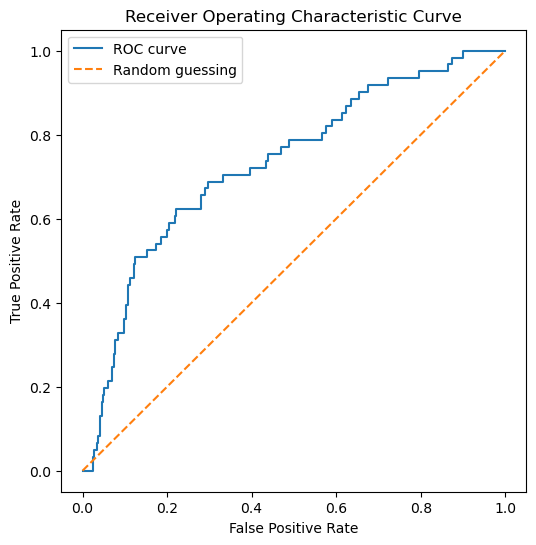

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

## ROC CURVE VISUALISEERIMINE

plt.figure(figsize=(6, 6))
plt.plot(stats['fpr'], stats['tpr'], label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guessing') # Draw a ROC curve with random guessing for visualisation
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

In [190]:
from sklearn.metrics import roc_auc_score

# Assuming y_true is your true binary labels
# and y_score is the target scores, which can be probability estimates of the positive class
auc = roc_auc_score(y_val, probs)
print(f'AUC: {auc}')

AUC: 0.7309365107959955
